# 실습을 통해 K-Means Clustering 모델 이해하기

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

## 가상의 데이터 생성
* 분류용 데이터 생성 메서드를 이용해서 label이 없는 데이터를 생성하였다.

In [2]:
input_feature, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.5, random_state=30) #데이터, #중심값
# print(input_feature)
input_feature[:5]

array([[ 3.25996508, -6.62137997],
       [ 2.68090757, -1.87003254],
       [ 2.54961207, -2.3823171 ],
       [ 2.03248083, -6.97156632],
       [ 3.04871092, -2.1664995 ]])

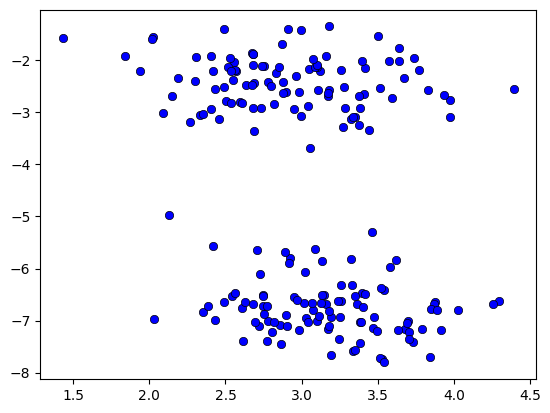

In [3]:
plt.scatter(input_feature[:, 0], input_feature[:, 1], c='blue', edgecolor='k', lw=0.5)
plt.show()

**[잠깐! 상식 - 1]**  
**plt.scatter 함수에 대해 알아보자**  
.  
plt.scatter( A , B , ... )  
.  
scatter 는 산점도를 그려주는 함수다.  
plt.scatter(A, B)를 하면, 좌표 (A, B) 에 점을 찍어준다는 의미다.  
예) plt.scatter(1, 2) 라고 한다면, 좌표 (1, 2) 에 점을 하나 찍는다.  
.  
그럼 동시에 여러개의 점을 찍고 싶다면?  
예를 들어, 좌표 (1, 2) , 좌표 (3, 1), 좌표 (4, 3) 세 개의 점을 한번에 찍고 싶다면  
아래와 같이 A 자리에 [1, 3, 4], B 자리에 [2, 1, 3]을 작성해주면 된다.  
.  
plt.scatter([1, 3, 4], [2, 1, 3])

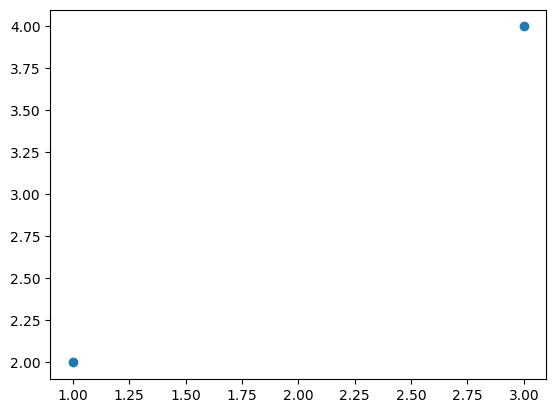

In [8]:
plt.scatter([1, 3],[2, 4])
plt.show()

**[잠깐! 상식 - 2]**  
**numpy array를 알아보자.**  

위에서 input_feature 와 같이 여러 숫자를 array[ ] 형식으로 담고 있는 데이터 형식이 바로 numpy의 array다.  
.  
그럼 예를 들어,  
A = array([[1, 2],  
           [3, 4],  
           [5, 6]])  
           와 같은 array가 있을 때,  
           1, 3, 5만 지정하고 싶다면 어떻게 해야할까?  
.  
우선 A[0] = [1, 2],  
    A[1] = [3, 4],  
    A[2] = [5, 6] 이다.  
.  
그럼, A[0, 0] = 1,  
     A[1, 0] = 3,  
     A[2, 0] = 5 다.  
(여기까지를 Indexing 이라고 말한다.)  
.  
자 이제, A[0, 0], A[1, 0], A[2, 0]을 한번에 표현하는 법만 알면된다.  
.  
A[:, 0] 이렇게 표현하면 된다.(이를 Slicing이라고 한다.)  
1, 3 <= A[:2, 0],  
3, 5 <= A[1:, 0]라고 표현할 수 있다.

## KMeans (초기화 = random)

In [9]:
model_r = KMeans(n_clusters=3, init="random").fit(input_feature)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Attributes of sklearn.clustering.KMeans

- cluster__centers_ : Coordinates of cluster centers

- labels_ : Labels of each point

- inertia_ : Sum of squared distances of samples to their closest cluster center.

- n__iter_ : Number of iterations run.

In [10]:
# center = np.zeros([3, 2])
center = model_r.cluster_centers_
center

array([[ 3.36298714, -7.12098734],
       [ 2.94138262, -6.34266031],
       [ 2.91383768, -2.41786968]])

In [11]:
c0 = center[0]
c1 = center[1]
c2 = center[2]

**그럼 이제, 데이터가 클러스터링된 결과를 시각화해서 확인해보자**  
.  
plt.scatter(cluster_0 에 속한 데이터만, 초록색(g)으로)  
plt.scatter(cluster_1 에 속한 데이터만, 빨간색(r)으로)  
plt.scatter(cluster_2 에 속한 데이터만, 파란색(b)으로)  
.  
plt.scatter(cluster_0 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_1 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_2 중심값, size는 200으로) # 기본값 = 100

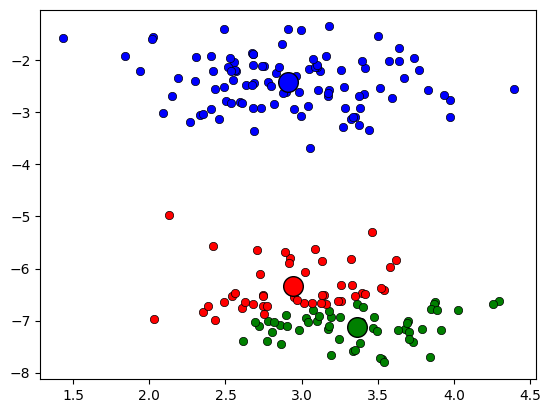

In [12]:
plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(c0[0], c0[1], s=200, c="g", edgecolor='k', lw=1)
plt.scatter(c1[0], c1[1], s=200, c="r", edgecolor='k', lw=1)
plt.scatter(c2[0], c2[1], s=200, c="b", edgecolor='k', lw=1)
plt.show()

## 초기화를 K-Means++로 수정해보자.

In [29]:
model_pp = KMeans(n_clusters=4, init="k-means++").fit(input_feature)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


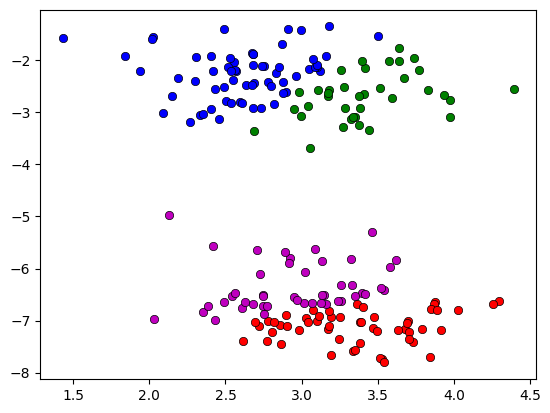

In [35]:
plt.scatter(input_feature[model_pp.labels_ == 0, 0], input_feature[model_pp.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_pp.labels_ == 1, 0], input_feature[model_pp.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_pp.labels_ == 2, 0], input_feature[model_pp.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_pp.labels_ == 3, 0], input_feature[model_pp.labels_ == 3, 1], marker='o', c='m', edgecolor='k', lw=0.5)
plt.show()

## K-Means의 적정 K를 판단하는 방법은 없을까?

K-Means는 처음에 클러스터의 갯수를 사람이 직접 설정해줘야하는 제약이 있다.  
그럼, 가장 적합한 K는 어떻게 판단할 수 있을까?

물론, 정성적으로 판단해서 정하기도 하지만,  
Sklearn에서 적정 K를 판단해주는 척도도 제공한다.

바로, 위에서 언급했던 Attributes 중 inertia_라는 값이다.

inertia = Sum of squared distances of samples to their closest cluster center(자신의 클러스터 중심점과 데이터(samples) 간의 거리의 합)

즉, 각 클러스터가 데이터와 중심점이 얼마나 가까이 붙어있는가를 의미하는 값이다.

중심점과 데이터가 가까이 붙어있을수록 클러스터의 응집도가 높다고 볼 수 있다.  
이 응집도를 클러스터의 평가 척도로 사용할 수 있다.

하지만, inertia 값은 본질 상, 클러스터가 커질수록 값이 작아지므로,  
클러스터 수에 대한 inertia값의 추세를 보고 적절한 K를 선택해야한다.


In [36]:
model_r.inertia_

83.42907250607442

그럼, K 를 바꿔보면서 inertia_값의 변화를 한번 살펴보자.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

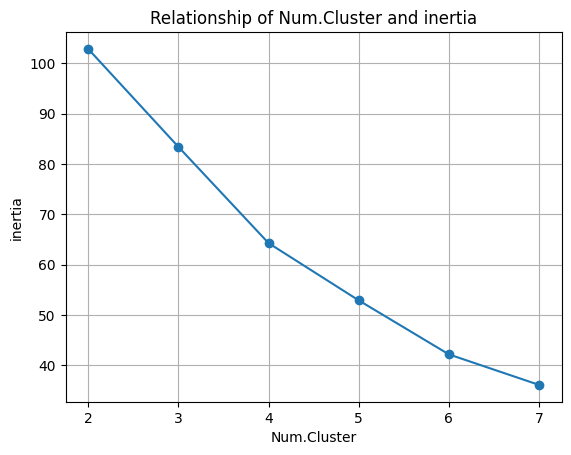

In [37]:
set_k = [k for k in range(2, 8)]
set_inertia = []
for k in set_k:
    model = KMeans(n_clusters=k)
    model.fit(input_feature)

    set_inertia.append(model.inertia_)

plt.plot(set_k, set_inertia, '-o')

plt.title('Relationship of Num.Cluster and inertia')
plt.xlabel('Num.Cluster')
plt.ylabel('inertia')
plt.xticks(set_k)
plt.grid()
plt.show()

## 데이터의 개수가 많으면, K-Means의 수행 시간은 어떻게 달라질까?

데이터가 매우 커지지 않는 이상, 큰 차이는 나지 않습니다.

**[잠깐! 상식]**  
코드 수행 시간을 체크할 때, 보통 time 패키지를 사용합니다.  
time.time() 은 해당 현재 시각을 반환해주는 함수로서,  
이 함수를 수행시간을 체크해볼 코드 앞뒤에 넣어서 시각의 차이를 계산함으로써, 수행시간을 체크합니다.

In [38]:
import time

start = time.time()
model_r = KMeans(n_clusters=3, init="random").fit(input_feature)
end = time.time()

end - start

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.11981892585754395

In [39]:
input_expended, _ = make_blobs(n_samples=200000, centers=1, cluster_std=0.5, random_state=30)

In [40]:
start = time.time()
model_r = KMeans(n_clusters=3, init="random").fit(input_expended)
end = time.time()

end - start

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.294461727142334

## K-Means 외의 다른 Clustering 방법론은 뭐가 있을까?

기본적인 K-Means 외에도 K-Means를 보완한 버전의 모델이 여러가지 있습니다.
.
또한, K-Means와 다른 방식으로 클러스터링을 하는 모델도 여러가지 있습니다.
계층적클러스터링, DBSCAN, Spectral Clustering 등이 있습니다.


## 그럼, 이러한 다양한 선택지 가운데, 어떤 것을 선택해야 할까?

기본적으로 각 방법론마다 궁합(?)이 맞는 특정 데이터 조건들이 있습니다.

자세한 내용은 직접 페이지에 들어가서 살펴봅시다.  
https://scikit-learn.org/stable/modules/clustering.html